In [1]:
import random
import seaborn as sns
import warnings #dont want to deal with warnings
warnings.filterwarnings('ignore')

# The Impossible Prisoners-Riddle

<img src="https://datascience.rhuleconlab.com/lectures/images/prisonersriddle.jpg">

Here is a riddle that seems impossible:

100 prisoners, numbered from 1 to 100 get the following deal:
- In a room are boxes numbered from 1 to 100.
- A guard takes 100 slips of paper containing the numbers from 1 to 100 and randomly put one slip in each box.
- The prisoners can enter the room one by one and open 50 boxes. Then they leave the room on the other side, so they cannot communicate with the prisoners who have yet to enter the room.
- The prisoners must leave the room exactly as they found it.
- If **all 100 prisoners** find the slip with their own number, all 100 prisoners go free. If one or more prisoners fail to find the slip with the own number, all 100 prisoners are executed.
- The prisoners are allowed to agree on a strategy before the first prisoner enters the room.

If each prisoner opens 50 boxes randomly, they have a 1-in-2 or 50% chance of finding the slip with their own number. This means that the probability that all 100 prisoners find their own number is $0.5^{100} = 0.00000000000000000000000000000079$%.

However, by agreeing to a strategy beforehand, the prisoners can push their probability of success to over 30%.

If you want to know more about the riddle and its solution, watch [this](https://www.youtube.com/watch?v=iSNsgj1OCLA).

In [30]:
# The code should output either loss or victory

# Conditions for a Victory:
## Everyone finds their number in less than 50 boxes_opened
## Method giving best odds, is loop strategy, where prisoner opens a box and follows the number in order
## Chance to win = 1 - chance to lose
## 1 - (1/50 + 1/51 + 1/52 ... + 1/100) = 1/3

# Conditions for a Loss:
## If ANY prisoner gets a loop which is longer than 50
## Chance of loss:
## 1/50 + 1/51 + 1/52 ... + 1/100 = 2/3

In [29]:
# First feature that the program should have is randomly generating loops
# If a loop happens to be longer than 50, loss is guaranteed
# Each prisonner has a unique set of loops
# There will be 100 individual loops

In [26]:
# This function returns the volume of 'winners' per group of prisoners, loop strategy
def individual_game(prisoner_count):

  big_loop = random.sample(range(1, prisoner_count + 1), prisoner_count) #this will be the loop (string of boxes to be opened)

  prisonners_loops = {}
  for i in range(1, prisoner_count + 1):
      prisonners_loops[i] = big_loop[i - 1]  #random unique value to each box

  prisoners = list(range(1, prisoner_count + 1))
  max_steps = prisoner_count // 2
  loop_lengths = []  #store the total cycle length of each prisoner
  survival_chances = []

  list_losers = []
  list_winners = []

  for i in prisoners:
      next_box = i
      fail_loop = []

      while next_box not in fail_loop:
          fail_loop.append(next_box)
          next_box = prisonners_loops[next_box]

      loop_length = len(fail_loop)  #the total length of the cycle
      loop_lengths.append(loop_length)

      #probability of survival = 1 / loop length
      survival_chances.append(1 / loop_length)

      if loop_length > max_steps:
          #print(f"Prisoner {i} failed. Cycle length: {loop_length}. Path: {fail_loop}")
          list_losers.append(i)
      else:
          #print(f"Prisoner {i} survived. Cycle length: {loop_length}. Path: {fail_loop}")
          list_winners.append(i)

  return len(list_winners)


In [27]:
def loop_histogram(repetitions, prisoner_count): #visualising the loop strategy
  survivor_counter = []
  for i in range(repetitions):
    survivor_counter.append(individual_game(prisoner_count))

  return sns.histplot(survivor_counter, bins = range(1, prisoner_count + 1))

<Axes: ylabel='Count'>

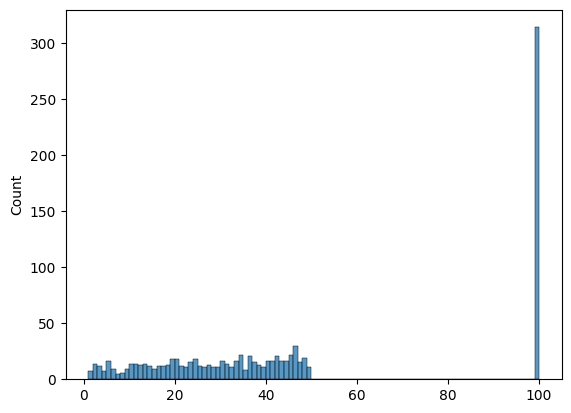

In [28]:
loop_histogram(1000, 100)

In [12]:
# This function returns the volume of 'winners' per group of prisoners, random strategy
def individual_game_random(prisoner_count):
  list_winners = []

  if prisoner_count:
    max_steps = prisoner_count//2 #the total boxes that can be opened will be half of total prisoners

    for i in range(1,prisoner_count+1):
      choices = random.sample(range(1, prisoner_count + 1), max_steps) #if all prisoners chose a random value
      if i in choices:
        list_winners.append(i)

    return len(list_winners)


In [13]:
def random_histogram(repetitions, prisoner_count): #visualising the no strategy
  survivor_counter = []
  for i in range(repetitions):
    survivor_counter.append(individual_game_random(prisoner_count))

  return sns.histplot(survivor_counter, bins = range(1, prisoner_count + 1))

<Axes: ylabel='Count'>

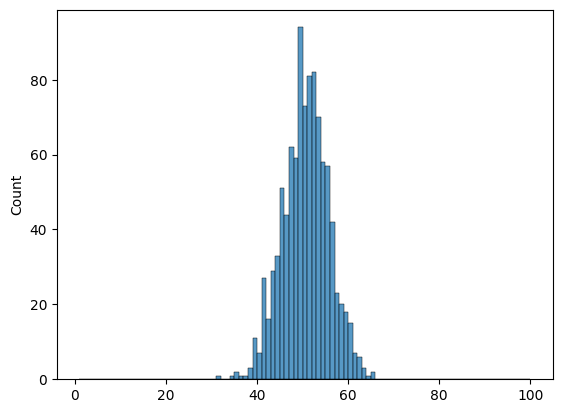

In [14]:
random_histogram(1000, 100)

In [15]:
#calculating the % of survival if using loop strategy
def game(prisoner_count, all=False):
  win = 0 #counter that builds up for every prisoner
  fail_loop = []

  if prisoner_count:
    big_loop = random.sample(range(1, prisoner_count + 1), prisoner_count) #this will be the loop (string of boxes to be opened)
    prisonners_loops = {}

    for i in range(1, prisoner_count + 1):
        prisonners_loops[i] = big_loop[i-1] # Assigning a random unique value to 100 boxes per prisoner

    prisoners = list(range(1, prisoner_count + 1)) #range of prisoners
    everyone_survived = True #toggle to check if anyone fails
    max_steps = prisoner_count//2 #the total boxes that can be opened will be half of total prisoners


    for i in prisoners:
      counter_fails = 0 #this counter needs to reset for every prisoner, otherwise it gives invalid for everyone past the 1st guy
      next_box = i

      while counter_fails < max_steps:
        value_in_box = prisonners_loops[next_box] #this part causes the value of an index, to become the next index to be visited
        counter_fails += 1
        fail_loop.append(next_box)

    # Condition for winning
        if value_in_box == i:
          win += 1 #increase counter for win, later use it to determine if 'everyone' found their box
          break #stop adding to the loop lenght once they find their unique number
        else:
          next_box = value_in_box
    # Condition for losing
      else:
        everyone_survived = False
        if all:
          if win > 0:
            print("This is how many people found their boxes before failure:", win)
          print("This is how many people didn't find their boxes", prisoner_count - win)
        break #if one prisoner fails, stop

# The conditions for the 'final' output
    if win == prisoner_count:
      return 1
    else:
      return 0

In [16]:
def loop_probability(repetitions, prisoner_count): #should output 0.31, more repetitions/prisonners = more accurate
  survivor_counter = 0
  for i in range(repetitions):
    survivor_counter += game(prisoner_count)

  print(survivor_counter/repetitions)



In [21]:
loop_probability(1000, 100)

0.322


In [23]:
def game_random(prisoner_count, all=False): #calculating probability to survive if using random strategy
  win = 0 #counter that builds up for every prisoner
  fail_loop = []

  if prisoner_count:
    max_steps = prisoner_count//2 #the total boxes that can be opened will be half of total prisoners

    for i in range(1,prisoner_count+1):
      choices = random.sample(range(1, prisoner_count + 1), max_steps) #if all prisoners chose a random value
      if i in choices:
        win += 1

    if win == prisoner_count:
      return 1
    else:
      return 0


In [24]:
def random_probability(repetitions, prisoner_count): #if it outputs anything more than 0, you should buy a lottery ticket
  survivor_counter = 0
  for i in range(repetitions):
      survivor_counter += game_random(prisoner_count)

  print(survivor_counter / repetitions)


In [25]:
random_probability(1000, 100)

0.0
